<a href="https://colab.research.google.com/github/Aman8883/Practice/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
class_names = ["Tshirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

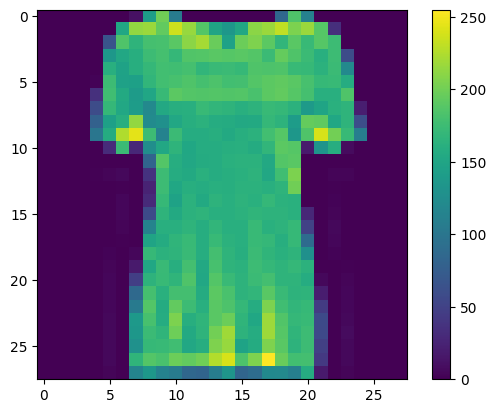

In [13]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)

In [14]:
train_images = train_images/255.0
test_images = test_images/255.0

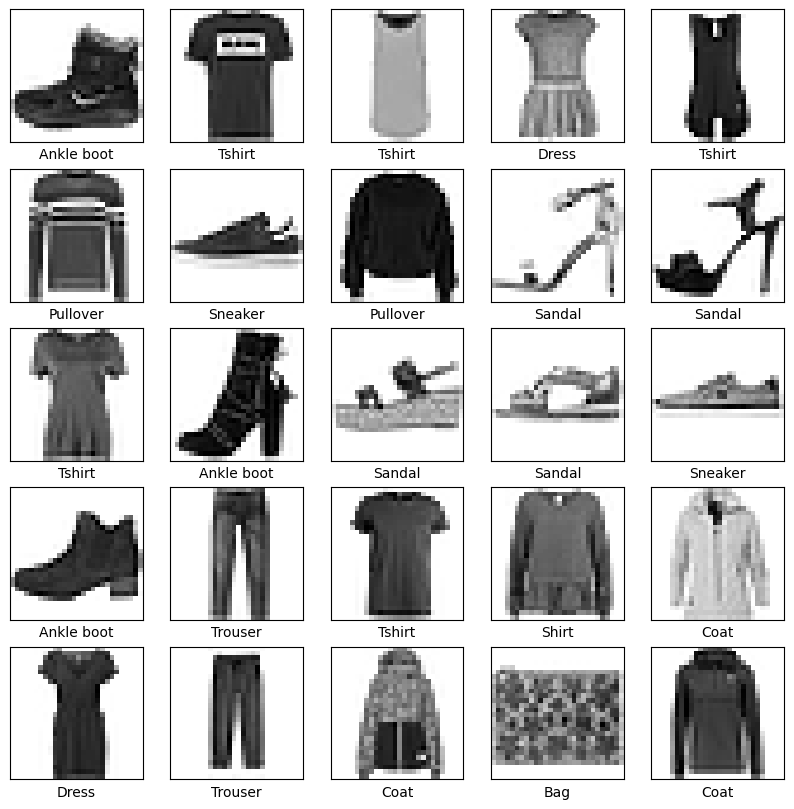

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10)
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics="accuracy")

In [24]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4945 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3725 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3343 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3099 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2938 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2788 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2454 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [25]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.3359 - accuracy: 0.8842 - 719ms/epoch - 2ms/step


In [26]:
print("Test Accuracy",test_acc * 100)

Test Accuracy 88.41999769210815


In [27]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [29]:
predictions[10]

array([1.5508871e-04, 1.3187091e-05, 3.8316838e-02, 7.5720230e-08,
       8.7945616e-01, 2.0275755e-05, 8.2037300e-02, 3.6228295e-07,
       2.4041293e-07, 5.4971167e-07], dtype=float32)

In [31]:
np.argmax(predictions[10])

4

In [32]:
test_labels[10]

4

In [45]:
def plot_image(i,predictions_array,true_label,img):
  true_label,img = true_label[i],img[i]
  plt.grid = False
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid=False
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

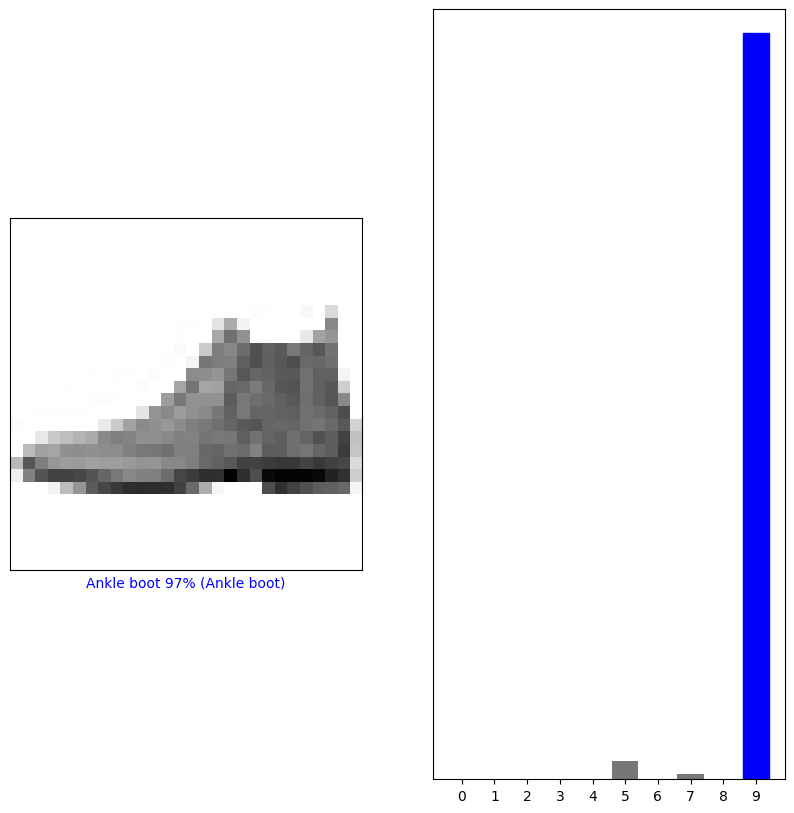

In [46]:
i=0
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

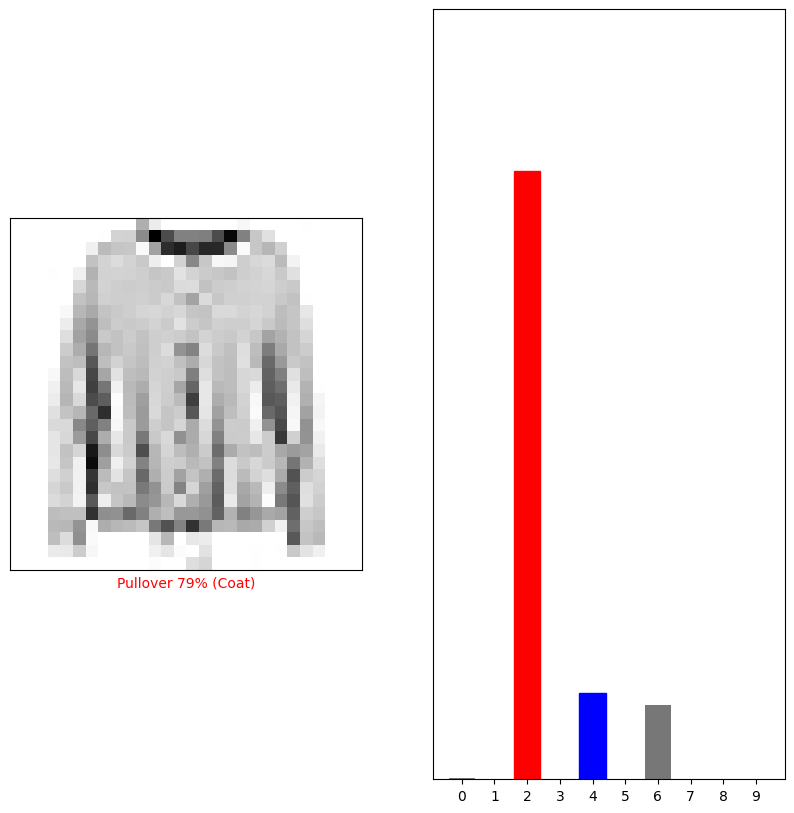

In [47]:
i=25
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

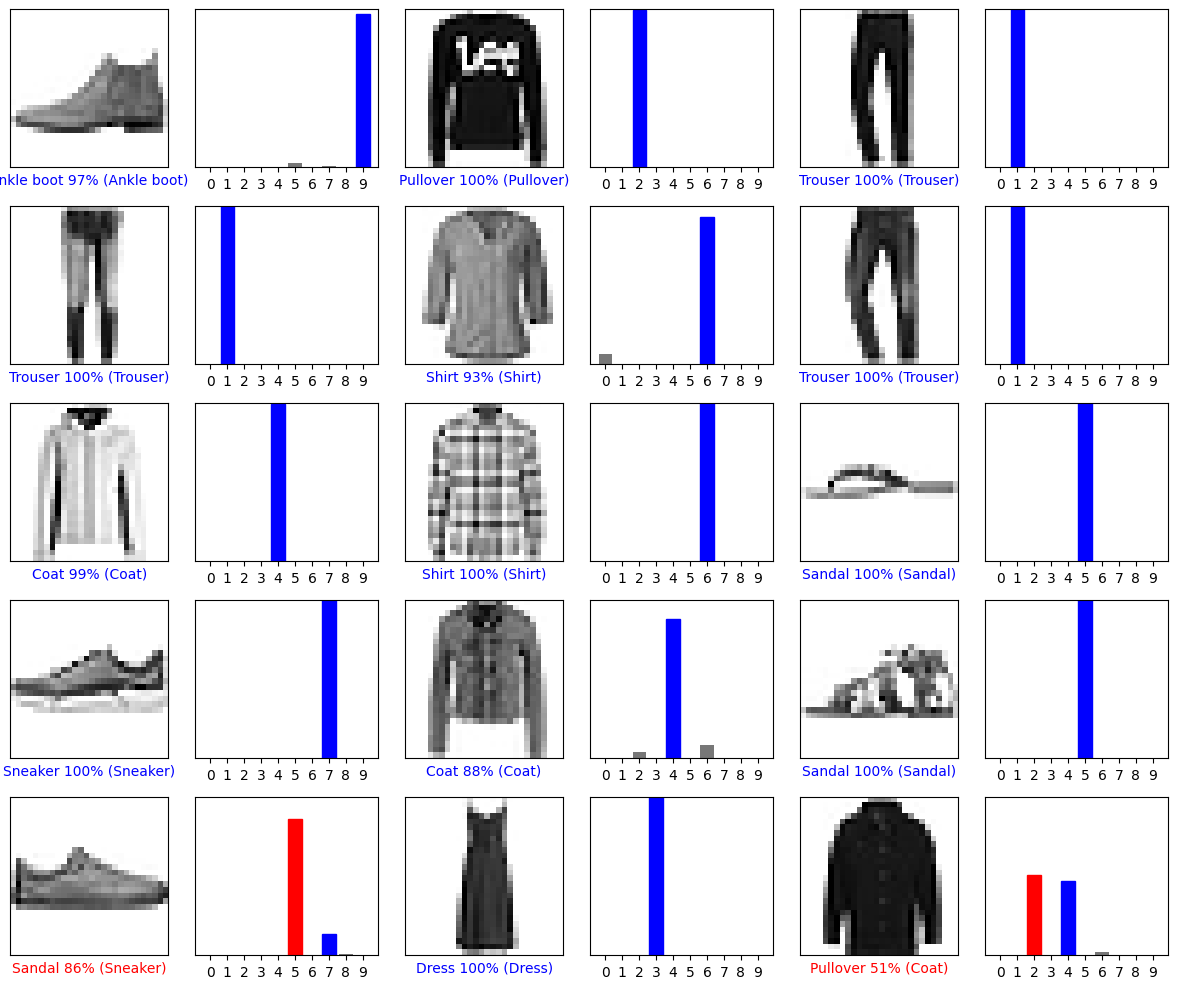

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()